<a href="https://colab.research.google.com/github/MariaG0205/Analisis-Numerico/blob/main/Ejercicios_Capitulo_3_AnalisisNum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Maria Alejandra Giraldo Duque. Cod 817021 
**Desarrollo ejercicios capitulo 3**

In [ ]:
import numpy as np
import sympy as sp
from scipy import optimize
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

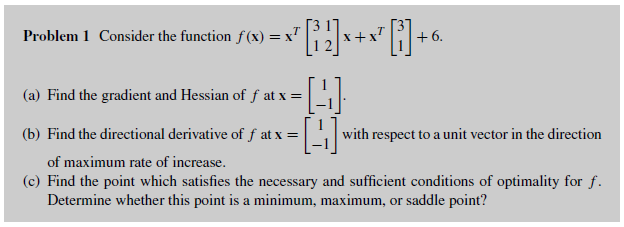

In [ ]:
x1,x2 = sp.symbols("x1 x2") #Crear variables simbólicas
x = sp.Matrix([[x1],[x2]]) #Agruparlas en una matriz
a=sp.Matrix([[3,1],[1,2]])
b=sp.Matrix([3,1])
f=x.T*a*x +x.T*b + sp.Matrix([6])

print('La función a optimizar es  \n', f)

La función a optimizar es  
 Matrix([[x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6]])


In [ ]:
f2=x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6
gradf = [f2.diff(x) for x in (x1, x2)] #Gradiente de f(x)
print('El gradiente de la función es: \n',gradf)

El gradiente de la función es: 
 [6*x1 + 2*x2 + 3, 2*x1 + 4*x2 + 1]


In [ ]:
hessf = [[f1.diff(x1_,x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)] #Matriz hessiana de f(x)
hessf

[[6, 2], [2, 4]]

Solución apartado A

In [ ]:
gra1=sp.lambdify([x1,x2],gradf)
hes1=sp.lambdify([x1,x2],hessf)

grady=gra1(1,-1)
print('El gradiente en el punto (1,-1) es : \n',grady)
hessy=hes1(1,-1)

print('El hessiano en el punto (1,-1) es : \n',hessy)

El gradiente en el punto (1,-1) es : 
 [7, -1]
El hessiano en el punto (1,-1) es : 
 [[6, 2], [2, 4]]


Solución apartado B

In [ ]:
vecnormal = gra1(1,-1)

vecnor=vecnormal/np.linalg.norm(vecnormal)
vecnor
print('El vector de maximo crecimiento, esto es el gradiente en (1,-1) es : \n', vecnormal, '\n')
print('El vector de maximo crecimiento normalizado  es : \n',vecnor , '\n')
print('La norma del vector es \n :',np.linalg.norm(vecnor))



El vector de maximo crecimiento, esto es el gradiente en (1,-1) es : 
 [7, -1] 

El vector de maximo crecimiento normalizado  es : 
 [ 0.98994949 -0.14142136] 

La norma del vector es 
 : 0.9999999999999999


In [ ]:
derivada = gradf @ vecnor
derivada
print('la derivada direccional de la dirección de la tasa máxima de aumento: \n',derivada, '\n')

derivada_val=sp.lambdify([x1,x2],derivada)
derivada_val2=grad_val(1,-1) @ (vecnor)
print('La derivada direccional en x es : \n',derivada_val2)

la derivada direccional de la dirección de la tasa máxima de aumento: 
 5.65685424949238*x1 + 1.41421356237309*x2 + 2.82842712474619 

La derivada direccional en x es : 
 7.071067811865475


Apartado C


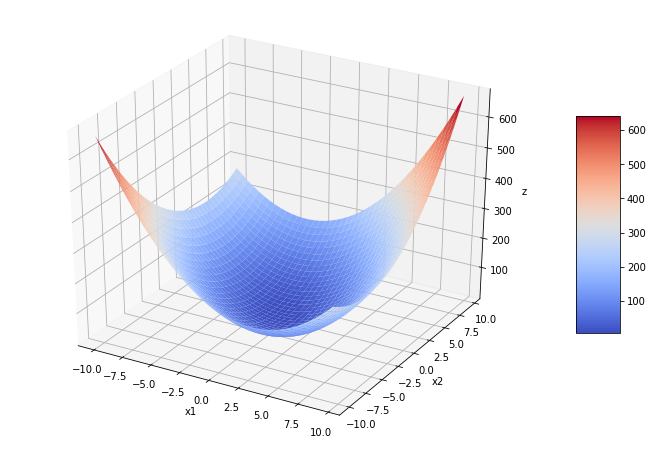

In [ ]:
f2=x1*(3*x1 + x2) + 3*x1 + x2*(x1 + 2*x2) + x2 + 6

XX = np.arange(-10, 10, 0.5)
YY= np.arange(-10, 10, 0.5)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],f2)

Z=F(X,Y)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

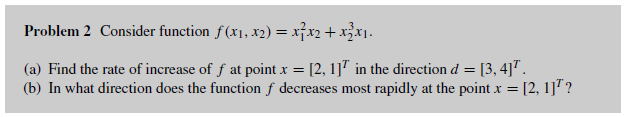

Solución apartado A

In [ ]:
x1,x2 = sp.symbols("x1 x2") #Crear variables simbólicas
fx=(x1**2*x2) + (x2**3*x1)

gradf = [fx.diff(x) for x in (x1, x2)] #Gradiente de f(x)
print('El gradiente de la función es: \n',gradf)

graeval=sp.lambdify([x1,x2],gradf)

grady=graeval(2,1)

vectord=np.array([[3],[4]])

d_normalice=vectord/np.linalg.norm(vectord)

El gradiente de la función es: 
 [2*x1*x2 + x2**3, x1**2 + 3*x1*x2**2]


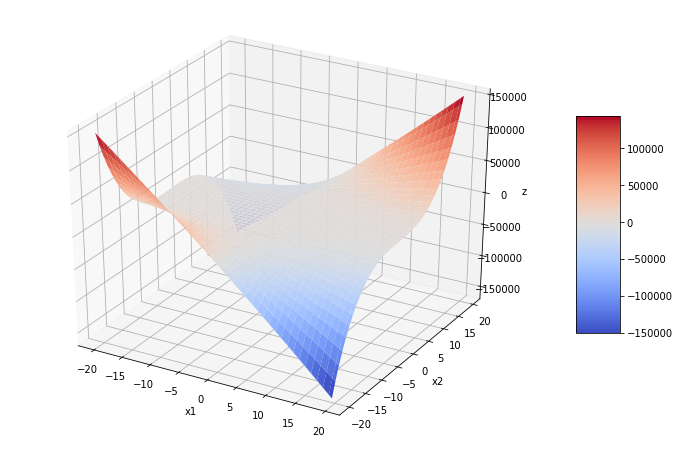

In [ ]:
XX = np.arange(-20, 20, 0.5)
YY= np.arange(-20, 20, 0.5)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()


In [ ]:
hessf = sp.derive_by_array(fx, [x1, x2])
hes1 = sp.lambdify((x1, x2), hessf, modules='numpy')
punto = np.array(hes1(2, 1))
dir1 = punto.T@vectord

print ('La tasa de aumento es: \n',dir1)

La tasa de aumento es: 
 [55]


Solución apartado B

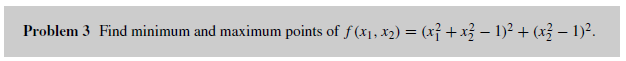

In [ ]:
x1,x2 = sp.symbols("x1 x2") #Crear variables simbólicas
f1=(x1**2+x2**2-1)**2 + (x2**2-1)**2

gradf = [f1.diff(x) for x in (x1, x2)] #Gradiente de f(x)
print('El gradiente de la función es: \n',gradf)


El gradiente de la función es: 
 [4*x1*(x1**2 + x2**2 - 1), 4*x2*(x2**2 - 1) + 4*x2*(x1**2 + x2**2 - 1)]


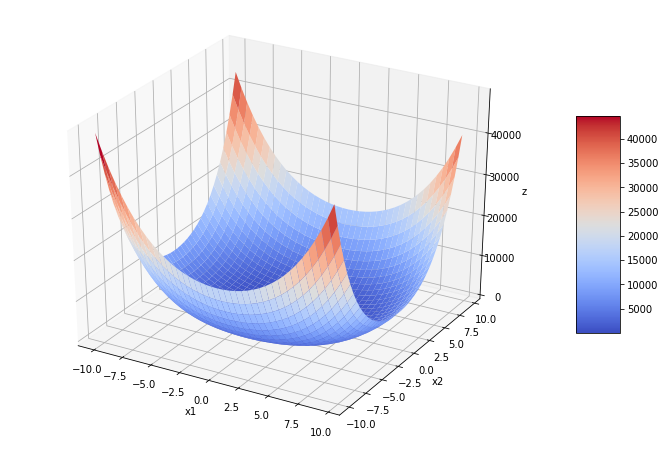

In [ ]:
#x1_vals=xmin[0:iter,0]
#x2_vals=xmin[0:iter,1]
#z=fx_val(x1_vals,x2_vals)

XX = np.arange(-10, 10, 0.5)
YY= np.arange(-10, 10, 0.5)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],f1)

Z=F(X,Y)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

AttributeError: ignored

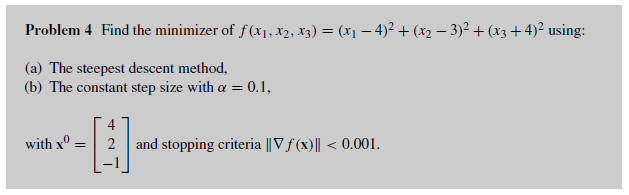

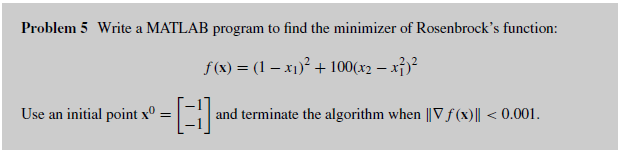